# Loss Analysis
In this notebook, we show how the loss curves were plotted.
Given that the training code recorded and saved to disk a loss curve per each inpainted image, this notebook uses the saved curves to plot them here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

Normally, the loss files will be saved to the `INFERENCE_DATA` folder. However for this specific scenario, they have been copied to the `other_observations_done/loss_files` folder.

In [2]:
INFERENCE_DATA_PATH = "loss_files/"

In [3]:
loss_dict = {}
for id in range(20):
  loss_txt_path = f"{INFERENCE_DATA_PATH}{id}.jpg_losses.txt"
  if os.path.exists(loss_txt_path):
    loss_dict[id]=(np.loadtxt(loss_txt_path).tolist())


In [4]:
loss_dict.keys()

dict_keys([0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

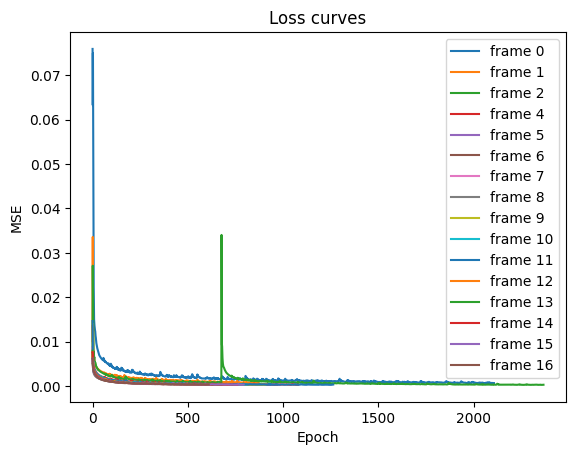

In [5]:
for key, value in (loss_dict.items()):
  plt.plot(value[1:], label=f"frame {key}")

plt.title("Loss curves")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()

## Next, we analyse the final MSE per each loss curve

In [6]:
final_mses = [v[-1] for v in loss_dict.values()]

Text(0, 0.5, 'Final MSE')

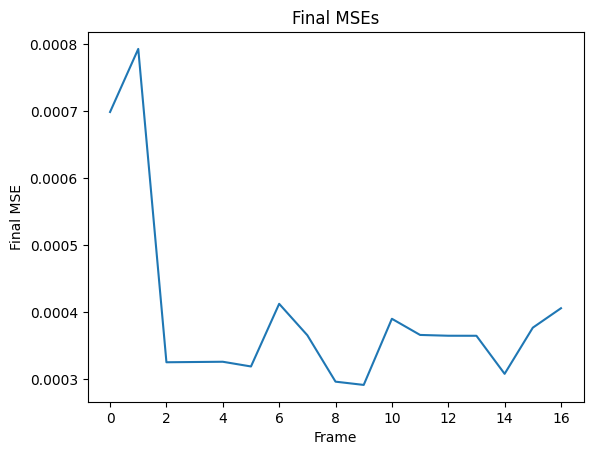

In [8]:
plt.plot(loss_dict.keys(), final_mses)
plt.title("Final MSEs")
plt.xlabel("Frame")
plt.ylabel("Final MSE")

In [9]:
final_mses = [min(v[1:]) for v in loss_dict.values()]

In [10]:
max(final_mses)

0.0007691524806432426

In [11]:
np.mean(final_mses)

0.00037858807991142385